### Importing the necessary libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

In [ ]:
df= pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
df.columns = df.columns.map(lambda x: x.lower().strip())
df= df.rename(columns={'study satisfaction':'study_satisfaction',
'job satisfaction':'job_satisfaction', 'sleep duration':'sleep',
'dietary habits':'diet', 'have you ever had suicidal thoughts ?':'suicidal_thoughts',
'work/study hours':'activity_hours','financial stress':'finance_stress',
'family history of mental illness':'mental_ill_hist','work pressure':'work_pressure',
'academic pressure':'academic_pressure'
})
df.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep', 'diet', 'degree', 'suicidal_thoughts', 'activity_hours',
       'finance_stress', 'mental_ill_hist', 'depression'],
      dtype='object')

In [7]:
df.dtypes

id                      int64
gender                 object
age                   float64
city                   object
profession             object
academic_pressure     float64
work_pressure         float64
cgpa                  float64
study_satisfaction    float64
job_satisfaction      float64
sleep                  object
diet                   object
degree                 object
suicidal_thoughts      object
activity_hours        float64
finance_stress         object
mental_ill_hist        object
depression              int64
dtype: object

In [8]:
df.isnull().sum()

id                    0
gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep                 0
diet                  0
degree                0
suicidal_thoughts     0
activity_hours        0
finance_stress        0
mental_ill_hist       0
depression            0
dtype: int64

In [9]:
df['finance_stress'].value_counts()

finance_stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

In [10]:
df["age"]=df["age"].astype(int)

df['finance_stress'] = df['finance_stress'].replace('?', np.nan) 
df['finance_stress'] = df['finance_stress'].astype(float)
df['finance_stress'].fillna(df['finance_stress'].mean(), inplace=True)

df.dtypes

C:\Users\Anindya\AppData\Local\Temp\ipykernel_20304\3991020697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['finance_stress'].fillna(df['finance_stress'].mean(), inplace=True)


id                      int64
gender                 object
age                     int64
city                   object
profession             object
academic_pressure     float64
work_pressure         float64
cgpa                  float64
study_satisfaction    float64
job_satisfaction      float64
sleep                  object
diet                   object
degree                 object
suicidal_thoughts      object
activity_hours        float64
finance_stress        float64
mental_ill_hist        object
depression              int64
dtype: object

In [11]:
df.loc[df['city'] == 'Less Delhi', 'city'] = 'Delhi'
df.loc[df['city'] == 'Mira', 'city'] = 'Unknown'
df.loc[df['city'] == 'M.Tech', 'city'] = 'Unknown'
df.loc[df['city'] == 'M.Com', 'city'] = 'Unknown'
df.loc[df['city'] == 'City', 'city'] = 'Unknown'
df.loc[df['city'] == 'Less than 5 Kalyan', 'city'] = 'Kalyan'
df.loc[df['city'] == '3.0', 'city'] = 'Unknown'
df.loc[df['city'] == 'ME', 'city'] = 'Unknown'


In [12]:
numeric= df.select_dtypes(include='number')

## Numeric Analysis

In [13]:
numeric.drop(columns=['id'], inplace=True)
numeric.head()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,activity_hours,finance_stress,depression
0,33,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
1,24,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0
2,31,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0
3,28,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1
4,25,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0


In [14]:
numeric.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,activity_hours,finance_stress,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437269,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


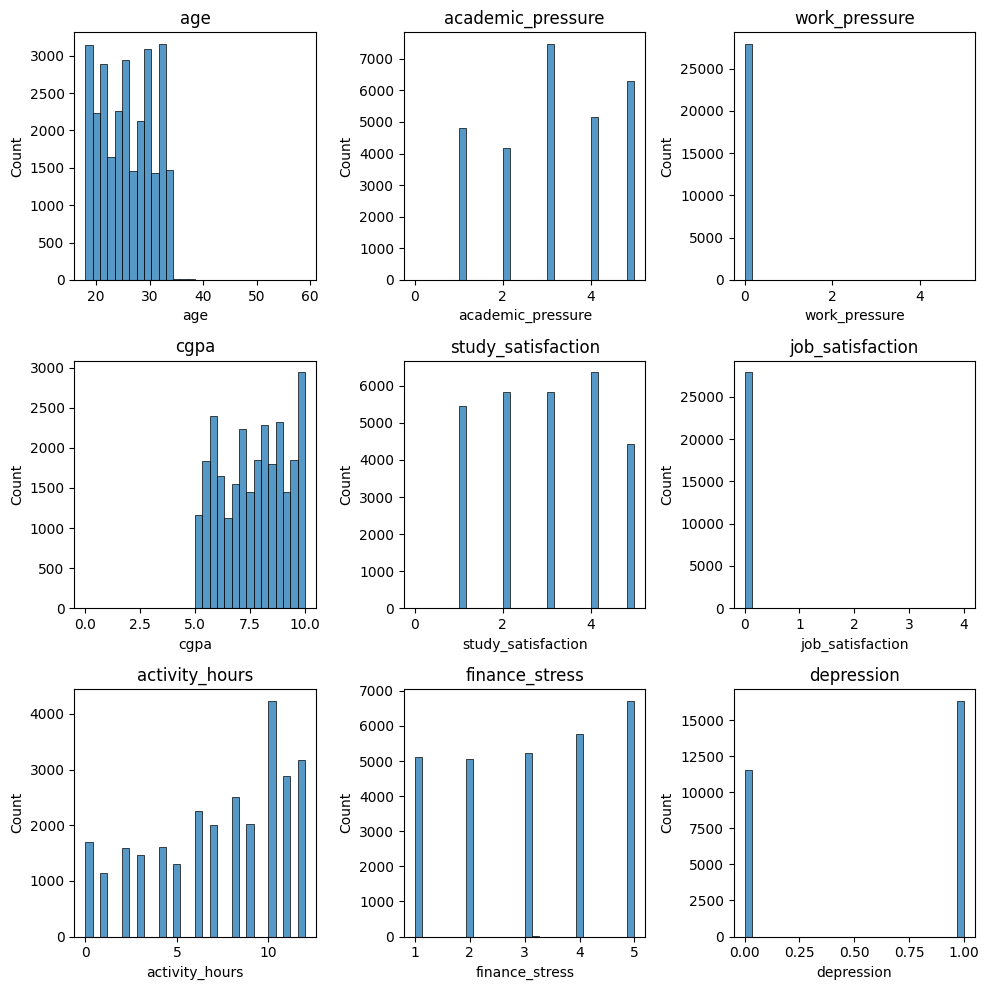

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for idx,each in enumerate(numeric,1):
    plt.subplot(3, 3, idx)
    sns.histplot(x=each, data=df,bins=30)
    plt.title(each) 
plt.tight_layout()

From the distributions we can see that 
- The age distribution is quite uniform. Can be explored further (/)
- Academic pressure have only discrete values and may be assossicated with depression (/)
- Work pressure values mostly skewed near zero means most student doesn't have work pressure and it might not be a strong predictor. (x)
- Cgpa is also quite normally distributed from 5 to 10. Can be a considered against depression factors (/)
- Study Satisfaction can also be considered associated with depression (/)
- Job satisfaction is mostly 0 indicating it can be ignored (x)
- Activity hours are mostly right skewed. Can be tested against depression (/)
- Financial Stress can be associated with stress. Can be explored. (/)

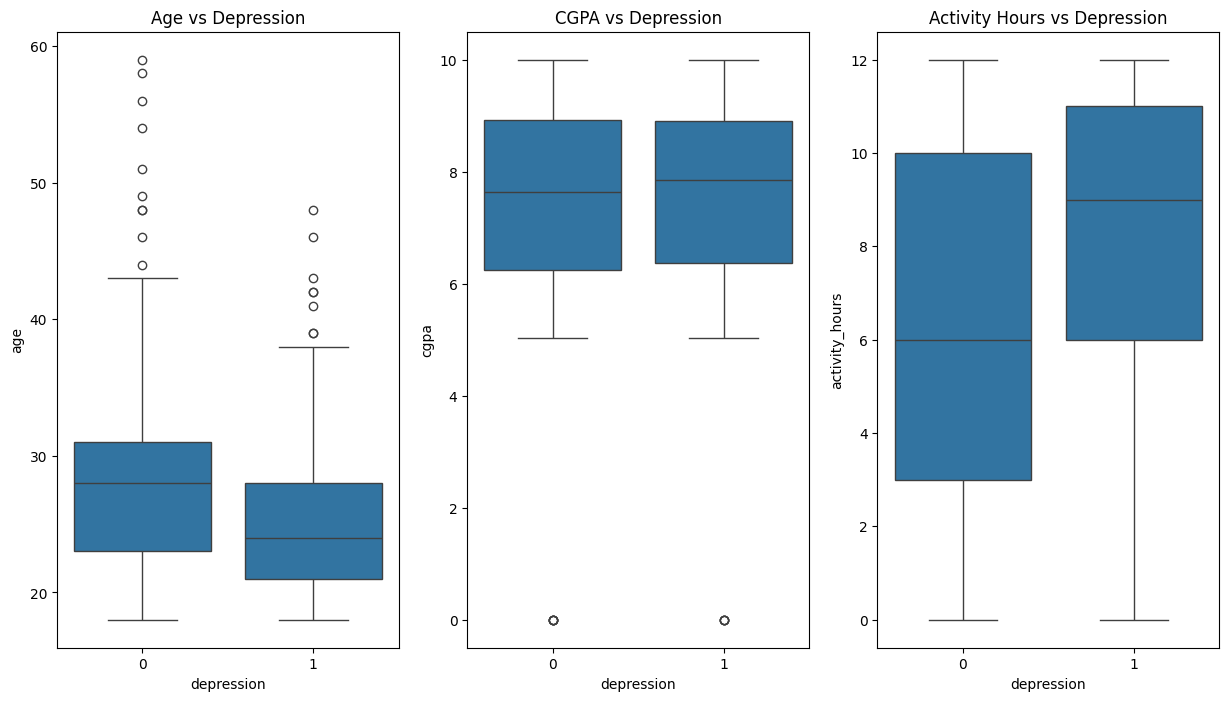

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

plt.subplot(1,3,1)
sns.boxplot(x='depression',y='age',data=df)
plt.title('Age vs Depression')

plt.subplot(1,3,2)
sns.boxplot(x='depression',y='cgpa',data=df)
plt.title('CGPA vs Depression')

plt.subplot(1,3,3)
sns.boxplot(x='depression',y='activity_hours',data=df)
plt.title('Activity Hours vs Depression')

plt.show()
# plt.tight_layout()

For Age(/):
- Median age for depression is quite low and Interquartile range for depressed persons is more compact and skewed to the younger population
- Outliers are present in both groups

Thus we can say that younger people have higher tendency toward depression

For Cgpa (x):
- median is mostly same in both groups and some outliers can be seen in both group

Thus cgpa deosnot show strong correlation with depression. 

For Work/Study Hours(/):
- Median and upper quartile values are higher for depressed individuals and slight skew towards higher activity in depressed individuals.

Thus more activity hours might be associated with depression (possibly burnout)

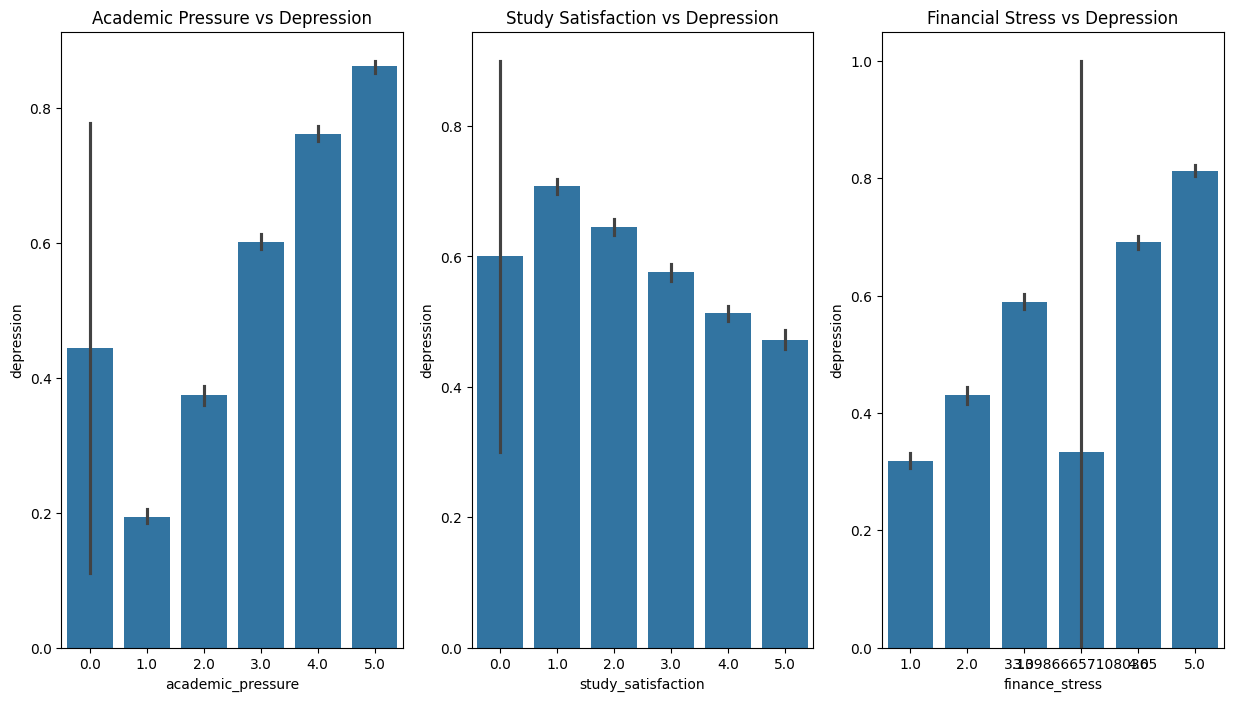

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

plt.subplot(1,3,1)
sns.barplot(y='depression',x='academic_pressure',data=df)
plt.title('Academic Pressure vs Depression')

plt.subplot(1,3,2)
sns.barplot(y='depression',x='study_satisfaction',data=df)
plt.title('Study Satisfaction vs Depression')

plt.subplot(1,3,3)
sns.barplot(y='depression',x='finance_stress',data=df)
plt.title('Financial Stress vs Depression')

plt.show()

For Academic Pressure (/):
- As academic pressure increases, the depression score also increases suggesting a correlation between these two factors

For Study Satisfaction (/):
- People with higher study satisfaction seems to have lower depression suggesting negative correlation between these two

For Financial Stress (/):
- Also seems to have somewhat correlated with depression

 

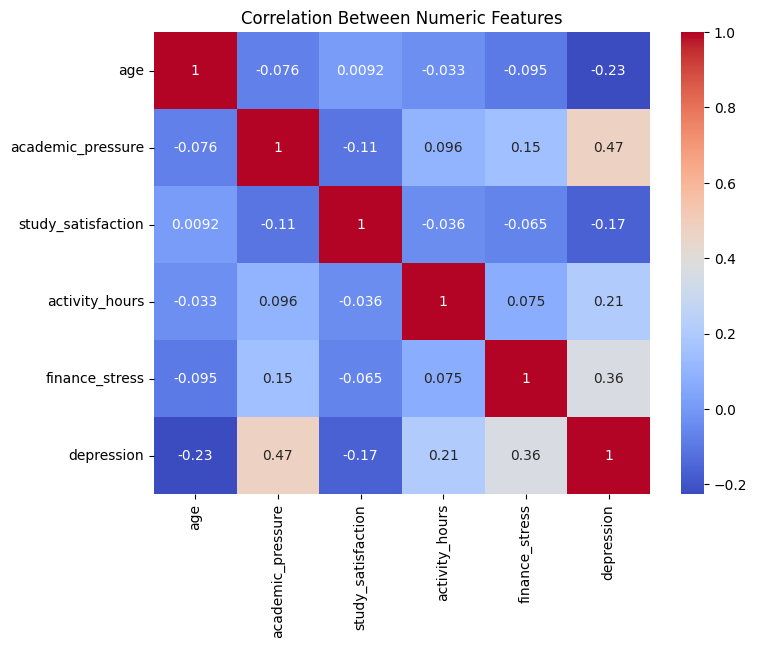

In [18]:
numeric= numeric.drop(columns=['cgpa','work_pressure','job_satisfaction'],axis=1)

corr = numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

The correlation matrix also confirms the previous findings. Academic pressure has a possitive correlation with depression whereas more study satisfaction indicates less prone to depression. With more financial stress more probability to suffer from depression can occur. Activity has also a weak positive correlation with depression.


In [19]:
## Categorical Analysis

In [20]:
categorical= df.select_dtypes(exclude='number')
categorical.head()

,gender,city,profession,sleep,diet,degree,suicidal_thoughts,mental_ill_hist
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,No


In [21]:
for col in categorical.columns:
    print('Value counts for',col)
    print(categorical[col].value_counts())
    print('\n')

Value counts for gender
gender
Male      15547
Female    12354
Name: count, dtype: int64


Value counts for city
city
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Unknown     

In [22]:
city_count= categorical['city'].value_counts()
categorical['city']= categorical['city'].apply(lambda x: x if city_count[x]> 50 else 'Other')
categorical['city'].value_counts()

city
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Other              26
Name: count, dtype: int64

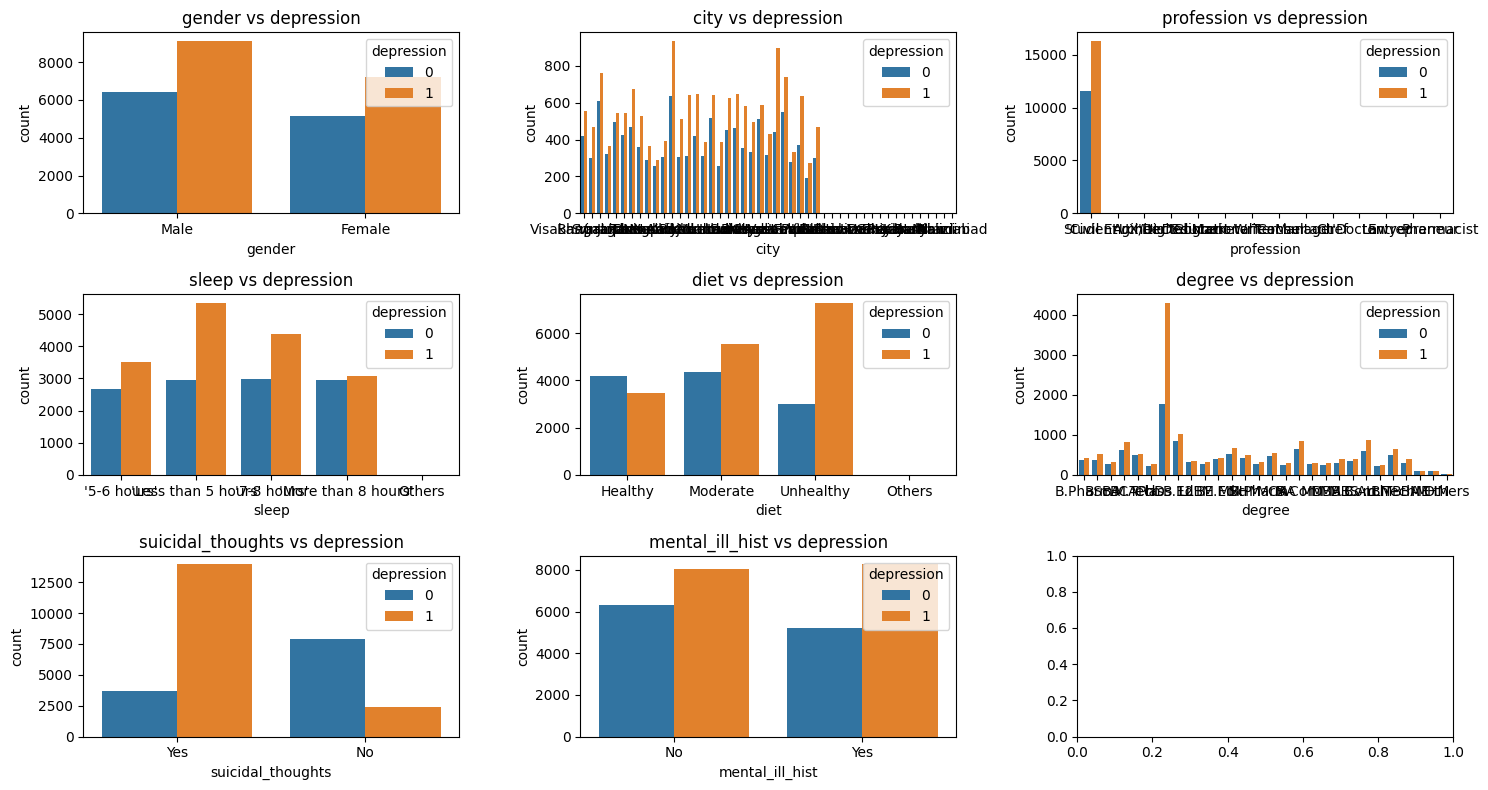

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(15, 8))

for idx,each in enumerate(categorical,1):
    plt.subplot(3, 3, idx)
    sns.countplot(x=each, hue='depression', data=df)
    plt.title(each+' vs depression') 
plt.tight_layout()

Key Insights from the plots:
- Genders are quite balanced and male shows slightly high depressive tendency (x)
- Less Sleep duration indicates a strong correlation with depression (/)
- A large proportion of people with suicidal thoughts also have depression, showing a strong relationship between these two factors. (/)
- Significant variation in city patterns with depression can be observed (x)
- The profession data is heavily skewed toward students, with a few other professions (/)
- Unhealthy diet can be seen highly connected to depressive tendencies (/)
- The type of degree may not play a large role in depression rates (/)
- People with mental illness history also exhibits higher depression than others (/)
- The type of degree may not play a large role in depression rates (x)

In [24]:
for col in categorical.columns:
    print('Proportion of depressed people in ',col)
    print('\n')
    print(df.groupby(col)['depression'].mean())

Proportion of depressed people in  gender


gender
Female    0.584507
Male      0.586287
Name: depression, dtype: float64
Proportion of depressed people in  city


city
'Less Delhi'            0.000000
'Less than 5 Kalyan'    0.000000
Agra                    0.534735
Ahmedabad               0.672976
Bangalore               0.608866
Bhavna                  1.000000
Bhopal                  0.619914
Chennai                 0.596610
Delhi                   0.609375
Faridabad               0.587852
Gaurav                  1.000000
Ghaziabad               0.574497
Harsh                   1.000000
Harsha                  0.500000
Hyderabad               0.669403
Indore                  0.604977
Jaipur                  0.524131
Kalyan                  0.594904
Kanpur                  0.541872
Khaziabad               1.000000
Kibara                  0.000000
Kolkata                 0.608818
Lucknow                 0.554978
Ludhiana                0.582358
Meerut                  0.597576
Mihir 

In [25]:
categorical= categorical.drop(columns=['profession','degree'],axis=1)

## Preprocessing

In [26]:
categorical['sleep'] = categorical['sleep'].str.replace("'", "").str.strip()
sleep_m= { 'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0}
categorical['sleep'] = categorical['sleep'].map(sleep_m)

diet_m= {'Healthy': 3, 'Moderate': 2, 'Unhealthy': 1, 'Others': 0}
categorical['diet'] = categorical['diet'].map(diet_m)

In [27]:
categorical.head()

,gender,city,sleep,diet,suicidal_thoughts,mental_ill_hist
0,Male,Visakhapatnam,2,3,Yes,No
1,Female,Bangalore,2,2,No,Yes
2,Male,Srinagar,1,3,No,Yes
3,Female,Varanasi,3,2,Yes,Yes
4,Female,Jaipur,2,2,Yes,No


In [28]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(categorical)

encoded_cat = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical.columns))
encoded_cat.reset_index(drop=True, inplace=True)
numeric.reset_index(drop=True, inplace=True)

numeric= numeric.drop(columns=['depression'],axis=1)

X= pd.concat([numeric,encoded_cat],axis=1)


In [29]:
y= df['depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22320, 51), (5581, 51), (22320,), (5581,))

## Model Training & Evaluation

Models considered: Logistic Regression, SVM, Random Forest, XGBoost, Gradient Boosting

In [36]:
models={
    'Logistic' : LogisticRegression(max_iter=1000, random_state=42),
    'SVM':SVC(kernel='rbf'),
    'RandomForest': RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42),
    'Xg': XGBClassifier(use_label_encoder=False, eval_metric='error', n_estimators=300),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
}

results=[]

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    prec= precision_score(y_test,y_pred)
    rec= recall_score(y_test,y_pred)
    f1= f1_score(y_test,y_pred)

    results.append([name, acc, prec, rec, f1])

results_df= pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

d:\Practice_2025\DS\Depression Data Analysis & Prediction\myvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
results_df.head()

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic,0.843039,0.857870,0.877295,0.867474
1,SVM,0.844831,0.853443,0.887393,0.870087
2,RandomForest,0.837305,0.846244,0.882497,0.863990
3,Xg,0.822433,0.840970,0.859241,0.850008
4,Gradient Boosting,0.844472,0.859712,0.877601,0.868565
